In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [13]:
from pandas.io.json import json_normalize

In [10]:
#read in data
with open('sensorswww_data.txt') as f:
    ftext=f.readlines()

In [ ]:
# now ftext is list of dictionaries

In [55]:
ftext[0]

'{"distinct_id":"595466e9a8e733434ce08de16e927d985e0b5d48","lib":{"$lib":"js","$lib_method":"code","$lib_version":"1.6.20"},"properties":{"$os":"windows","$model":"pc","$os_version":"6.1","$screen_height":800,"$screen_width":1280,"$lib":"js","$lib_version":"1.6.20","$browser":"chrome","$browser_version":"56","$latest_referrer":"","$latest_referrer_host":"","$latest_utm_source":"baidu","$latest_utm_medium":"cpc","$latest_utm_campaign":"通用词","$latest_utm_content":"通用-用户画像","$latest_utm_term":"用户画像","_latest_ch":"demo","_session_referrer":"https://www.baidu.com/baidu.php","_session_referrer_host":"www.baidu.com","session_page_url":"https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D","pageUrl":"https://sensorsdata.cn/?ch=demo","pageStayTime":5.692,"pagePosition":2,"$is_first_day":true,"$is_first_time":false,"$ip":"219.135.131.

In [ ]:
#use json.loads to convert to json/dictionaries

In [ ]:
#now transform every item into json and save them in one big list

In [11]:
alist=[]
for i in range(len(ftext)):
    alist.append(json.loads(ftext[i]))
    

In [ ]:
# alist is a list of dictionaries with every item, but they are nested dictionaries too in the properties

In [15]:
import copy
new_list=copy.deepcopy(alist)

In [ ]:
#now i want to convert everything to dataframe
# a lot of important info are in properties which is a dictionary of dictionaries

In [186]:
"""
prop_dic=new_list[0].pop('properties')    #store properties in a separate dictionary
new_list[0].pop('lib')                     # exclude the lib column
prop_df=pd.DataFrame([prop_dic])
df=pd.DataFrame([new_list[0]])
"""

In [ ]:
#json normalize is a great tool, can transform nested dictionaries flatten and into datafrmae

In [16]:
df=json_normalize(new_list)

In [18]:
"""
import pickle

filename='df.pkl'
pickle.dump(df,open(filename,'wb'))
"""

In [17]:
df.shape

(75092, 70)

### Look at  data individually

In [198]:
one_user=df[df['distinct_id']=='595466e9a8e733434ce08de16e927d985e0b5d48']

In [46]:
sec_user=df[df['distinct_id']=='9939d3e087bca29c42334d96dccd25ca0e06652a']

In [33]:
one_user.shape

(2, 70)

In [47]:
sec_user.shape

(22, 70)

In [41]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
    print(one_user.iloc[0])

                                                                           0654392402996
_nocache                                        595466e9a8e733434ce08de16e927d985e0b5d48
distinct_id                                                                  index_leave
event                                                                                NaN
jssdk_error                                                                           js
lib.$lib                                                                            code
lib.$lib_method                                                                   1.6.20
lib.$lib_version                                                                  chrome
properties.$browser                                                                   56
properties.$browser_version                                                          NaN
properties.$first_browser_language                                                   NaN
properties.$first_ref

In [42]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
    print(one_user.iloc[1])

                                                                           4967393021929
_nocache                                        595466e9a8e733434ce08de16e927d985e0b5d48
distinct_id                                                                   demo_leave
event                                                                                NaN
jssdk_error                                                                           js
lib.$lib                                                                            code
lib.$lib_method                                                                   1.6.20
lib.$lib_version                                                                  chrome
properties.$browser                                                                   56
properties.$browser_version                                                          NaN
properties.$first_browser_language                                                   NaN
properties.$first_ref

In [51]:
#order by time to look at squence of actions

In [53]:
sec_sort=sec_user.sort_values(by=['time'])

In [55]:
sec_sort['event']

2                  $pageview
3                   btnClick
4                   btnClick
8                   btnClick
17      click_send_cellphone
23     verify_cellphone_code
25     verify_cellphone_code
32               clickSubmit
44                  btnClick
45               index_leave
46                 $pageview
106                 btnClick
107               demo_leave
108                $pageview
109                 btnClick
110                $pageview
114                 btnClick
115                $pageview
119                $pageview
120              index_leave
572               demo_leave
1                        NaN
Name: event, dtype: object

In [127]:
# first page view
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):      
    print(sec_user.loc[32])
    
    #utm_source: demo

                                                                  7825449252929
_nocache                               9939d3e087bca29c42334d96dccd25ca0e06652a
distinct_id                                                         clickSubmit
event                                                                       NaN
jssdk_error                                                                  js
lib.$lib                                                                   code
lib.$lib_method                                                          1.6.20
lib.$lib_version                                                         chrome
properties.$browser                                                          56
properties.$browser_version                                                 NaN
properties.$first_browser_language                                          NaN
properties.$first_referrer                                                  NaN
properties.$first_referrer_host         

In [110]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):      
    print(sec_user.loc[4])

                                                                  8207407748558
_nocache                               9939d3e087bca29c42334d96dccd25ca0e06652a
distinct_id                                                            btnClick
event                                                                       NaN
jssdk_error                                                                  js
lib.$lib                                                                   code
lib.$lib_method                                                          1.6.20
lib.$lib_version                                                         chrome
properties.$browser                                                          56
properties.$browser_version                                                 NaN
properties.$first_browser_language                                          NaN
properties.$first_referrer                                                  NaN
properties.$first_referrer_host         

In [129]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):      
    print(sec_user.loc[4])

                                                                  8207407748558
_nocache                               9939d3e087bca29c42334d96dccd25ca0e06652a
distinct_id                                                            btnClick
event                                                                       NaN
jssdk_error                                                                  js
lib.$lib                                                                   code
lib.$lib_method                                                          1.6.20
lib.$lib_version                                                         chrome
properties.$browser                                                          56
properties.$browser_version                                                 NaN
properties.$first_browser_language                                          NaN
properties.$first_referrer                                                  NaN
properties.$first_referrer_host         

### What i found after learning from two individual uers' behaviors
    * Only when leaving the page there is page stay time
    * 同样的button click event数据基本是一样的 除了name选项 前面的是request申请试用按钮， 后面是demo链接按钮 网页有不同的链接
    * pageview不同event的时候就是跳转到不同页面的时候以下是不同的：properties.$title 汉字的网页title，         properties.$url，properties.$url_path
    * path 相当于后缀就是url的后缀 所以短一些 properties.session_page_url 是不变的
    * pagePosition 当前页面滚动到什么地方 但是一共就4个值index leave的时候是1

## Data exploration: user activity level for different events

In [133]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

### Convert timestamp to datetime to extract day information

In [191]:
import datetime
datetime.datetime.fromtimestamp(df['time'][0] / 1e3)

datetime.datetime(2017, 3, 6, 1, 4, 7, 953000)

In [144]:
# this is about one month's data


    * This is about one month's data
    * Then i want to look at user activity by day of week
    * group user activity by day of week

In [192]:
def convert_day(t):
    
    return datetime.datetime.fromtimestamp( t / 1e3)

In [193]:
df['date']=df['time'].apply(convert_day)

In [194]:
df['day']=df['date'].apply(lambda x:x.weekday())

In [310]:
df['month_day']=[df['date'][i].day for i in range(df.shape[0])]

In [195]:
df['day'].value_counts()   # now column day contains values form monday to sunday where monday is 0, sunday is 6

0    18129
1    14851
4    14583
3    10304
2     8849
6     5718
5     2658
Name: day, dtype: int64

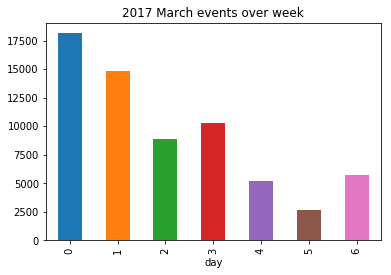

In [182]:
groups=df.groupby('day')['event'].count()

groups.plot.bar()
plt.title('2017 March events over week')
plt.show()


### This graph shows number of events vs weekday from monday to sunday, it looks like more activities in Monday and Tuesday and very less activies in Sat and Sunday. 


### Now i want to look at user activity levels for different events, group by event and count distinct user id as a new table

In [188]:
#let me see how many distinct user
len(df['distinct_id'].value_counts())

11756

In [190]:
df.shape   # with 75092 records, there are actually 11756 users

(75092, 72)

In [25]:
table_event=df.groupby('event')['distinct_id'].nunique()   # this is to group by event and count distinct id number

In [26]:
table_event.sort_values(ascending=False)

event
$pageview                11587
index_leave               6946
btnClick                  4501
demo_leave                1436
about_leave                712
courses_leave              692
click_send_cellphone       501
formSubmit                 497
verify_cellphone_code      472
clickSubmit                461
courses_play_leave         370
page_close                  97
Name: distinct_id, dtype: int64

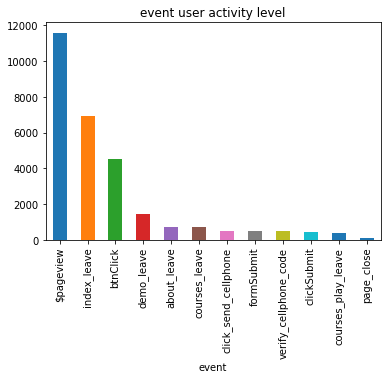

In [624]:
table_event.sort_values(ascending=False).plot(kind='bar')
plt.title('event user activity level')
plt.show()

### Horizontal bar chart

In [214]:
test=table_event.sort_values(ascending=False)


pandas.core.series.Series

In [220]:
test

event
$pageview                11587
index_leave               6946
btnClick                  4501
demo_leave                1436
about_leave                712
courses_leave              692
click_send_cellphone       501
formSubmit                 497
verify_cellphone_code      472
clickSubmit                461
courses_play_leave         370
page_close                  97
Name: distinct_id, dtype: int64

In [228]:
import itertools 
x=list(test.index)
counts=list(test.values)

x_pos=[i for i,_ in enumerate(x)]

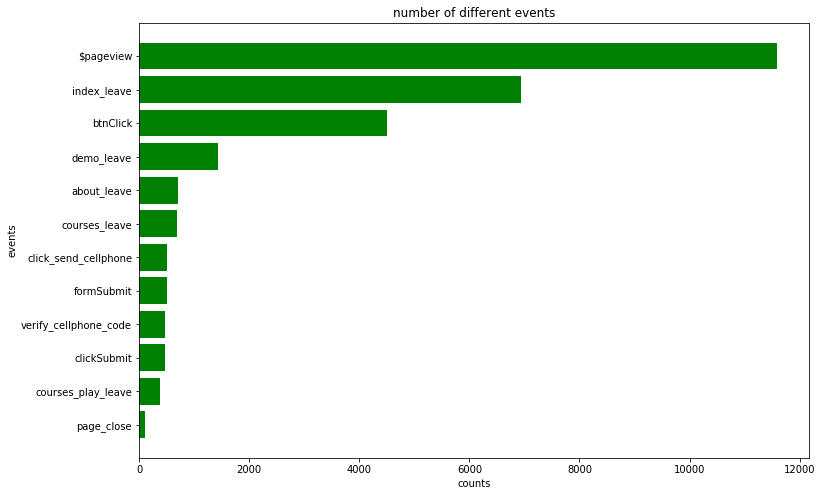

In [238]:
plt.figure(figsize=(12,8))
plt.barh(x_pos[::-1],counts,color='green')
plt.ylabel('events')
plt.xlabel('counts')
plt.title('number of different events')

plt.yticks(x_pos[::-1],x)
plt.show()

* Funnel Analysis: To identify the bottleneck of conversion
* procedure i defined: pageview -> btnclick->  click send cellphone-> formsubmit/clicksubmit

In [274]:
df_event_counts

,event,count,cr
0,$pageview,11587,1.000000
1,index_leave,6946,0.599465
2,btnClick,4501,0.647999
3,demo_leave,1436,0.319040
4,about_leave,712,0.495822
5,courses_leave,692,0.971910
6,click_send_cellphone,501,0.723988
7,formSubmit,497,0.992016
8,verify_cellphone_code,472,0.949698
9,clickSubmit,461,0.976695


In [ ]:
# this is the new funnel that i defined, now calculate the new conversion rate

In [284]:
for i in range(4):
    if i==0:
        df_select_event['cr']=1
    else:
        df_select_event['cr'].iloc[i]=df_select_event.iloc[i]['count']/df_select_event.iloc[i-1]['count']
    

/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [285]:
df_select_event

,event,count,cr
0,$pageview,11587,1.000000
2,btnClick,4501,0.388453
6,click_send_cellphone,501,0.111309
7,formSubmit,497,0.992016


* sharp drop from page view to button click, similarly on previous bar chart too, which could because most users do not even have the interest to click on pages.
* there is also drop from botton click to send cell phone verification code, some users who clicked multiple buttons but do not want to register with cell phone number maybe due to privacy concerns?
* suggestions: try to improve index page quality so that more engagement could be created with the users

## Stay time

In [291]:
df['properties.pageStayTime'].describe()   #after taking a look the data only when the event is leaving one page there will be one reported stay time

count    1.672000e+04
mean     6.681742e+03
std      5.343221e+04
min      3.300000e-02
25%      5.390750e+00
50%      2.057950e+01
75%      2.261860e+02
max      2.918014e+06
Name: properties.pageStayTime, dtype: float64

 * By looking at different pages' staytime, we can have a rough idea what page seems more interesting

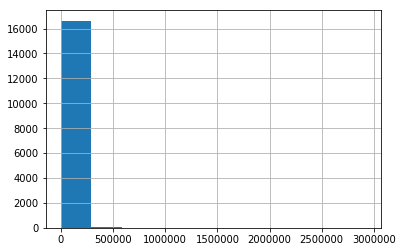

In [295]:
df['properties.pageStayTime'].hist()
plt.show()

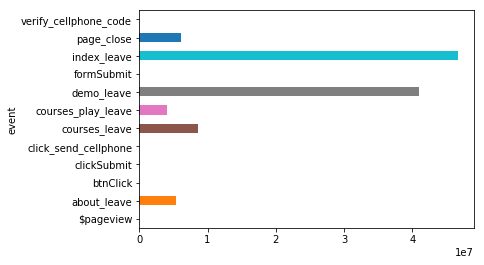

In [299]:
df.groupby('event')['properties.pageStayTime'].sum().dropna().plot.barh()

This makes sense that people has index page open most of the time, demo may take a longer time to watch too.Aabout page and other pages may not account that much

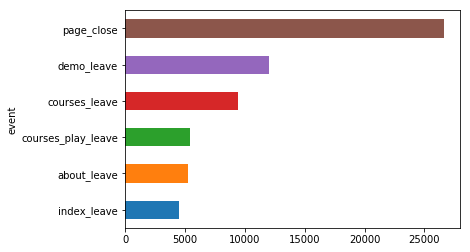

In [309]:
df.groupby('event')['properties.pageStayTime'].mean().dropna().sort_values().plot.barh()

   This is the average time that people spend on each page. again, demo and course are the ones that play some videos, users are supposed to spend much time on it. The least interesting page is the index page, which confirms preivous finding that the front page is not interesting enough, the users neither wants to click buttons nore spend too much time on it

## Compare user behavior

In [5]:
#df.groupby('distinct_id')['event'].count().sort_values(ascending=False)

In [317]:
df.groupby('distinct_id')['event'].count().describe()

count    11756.000000
mean         5.586339
std         10.485401
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        254.000000
Name: event, dtype: float64

* on average there are 5 events for each user, with most active user having 254 events

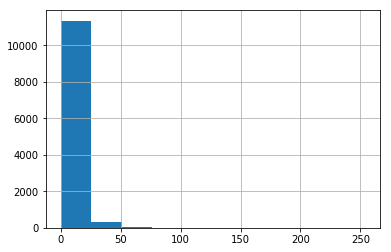

In [320]:
df.groupby('distinct_id')['event'].count().hist()

In [321]:
df.groupby('distinct_id')['event'].count().median()

2.0

In [21]:
user_activity=pd.DataFrame(df.groupby('distinct_id')['event'].count()).reset_index()

In [22]:
user_activity.head()

,distinct_id,event
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,6
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1
2,000c46a27ef69fa22b56d253a9c72773338a1686,22
3,000ed1dcd942969b458c5b308937c6389c08f999,4
4,00111feff544ef5280a4c7064a362a9ea59c9389,1


In [331]:
df['properties.$browser'].value_counts()

chrome            42091
safari             6952
firefox            3775
qq                 2973
sogou              2779
ie                 2254
edge               1297
micromessenger     1125
uc                  866
maxthon             316
webview             292
baidu               235
theworld            153
mi                  148
na                   87
opera                87
liebao               82
android              65
360                  59
tt                   28
yandex                4
coolnovo              4
ali-ap                1
Name: properties.$browser, dtype: int64

In [333]:
df['properties.$latest_utm_medium'].value_counts()

cpc                   34623
mcpc                   3255
mfeed                   934
default                 538
answer                  133
banner                   67
hao.caibaojian.com       33
production               27
sidonghui                24
toutiao.io               20
referral                 15
youjian                   8
lixinya                   6
customer_m                5
sidashidai                2
edm                       1
Name: properties.$latest_utm_medium, dtype: int64

### Campaign Tagging
    five tags
    * medium: mechanism, how you sent your messages to the user, including email, cpc(cost per click),social medium
    * source: where the user came from, could be a specific web page, link in an email, search engie
    * campaign: name of marketing campaign
    * content: different versions of a promotion, useful when you want to test out which promotion is more effective
    * term: identify keyword for paid search campaign, manual tagging
    from google analytics

In [335]:
df['properties.$utm_medium'].value_counts()

cpc           10463
mcpc           2332
mfeed          1065
default          26
production        6
answer            4
Name: properties.$utm_medium, dtype: int64

    *I am not sure the meaning of mcpc, mfeed and default here, but cpc is the highest here which I think means that the search engine campaign works the best in directing users to the website.

In [336]:
df['properties.$utm_source'].value_counts()

baidu            12368
sogou             1193
google             232
wechat             114
sanjieke.cn         68
next.36kr.com       19
admin                6
sales4c              5
hzcaibin             4
23h5                 4
liquantao            4
zhihu                4
sunjiaqian           3
mulumu.com           3
zhangyuejiao         2
wangxuelin           2
zhoushunzhou         2
qiye.36kr.com        2
xiuxin               1
linhuiyong           1
liujinbo1            1
admin10              1
jonson               1
xiangc               1
fuyu                 1
zhangji              1
dichang              1
lul                  1
tianguang            1
lingchentian         1
Name: properties.$utm_source, dtype: int64

  * Here another finding is that most users are from baidu website which is a similar search engine as google in China followed by other search websites.

 * Now try to look at how many users view each title of the website

In [24]:

title_group=pd.DataFrame(df.groupby('properties.$title')['distinct_id'].nunique()).reset_index()

In [352]:
title_group.sort_values(by='distinct_id', ascending=False)[:10]

,properties.$title,distinct_id
99,神策数据 | Sensors Data - 国内领先的用户行为分析产品,9343
33,介绍 · Sensors Analytics 使用手册,2134
94,神策分析|Sensors Analytics-帮你实现数据驱动－demo,1753
95,神策分析|Sensors Analytics-帮你实现数据驱动－产品,1653
93,神策分析|Sensors Analytics-帮你实现数据驱动－B轮融资发布会,1274
92,神策分析|Sensors Analytics-帮你实现数据驱动-视频列表,849
96,神策分析|Sensors Analytics-帮你实现数据驱动－关于,834
97,神策分析|Sensors Analytics-帮你实现数据驱动－视频播放,390
71,数据模型 · Sensors Analytics 使用手册,166
18,JavaScript SDK · Sensors Analytics 使用手册,125


   * This is the list of pages users watched most, the top three are:index page, introduction, demo, product some conferences and manual, which are the logical order of users view the website.

In [353]:
title_group.sort_values(by='distinct_id', ascending=False)[-10:]

,properties.$title,distinct_id
56,导入状态 · Sensors Analytics 使用手册,1
1,3 神策分析|Sensors Analytics-帮你实现数据驱动－产品,1
45,分析师事件权限设置工具 · Sensors Analytics 使用手册,1
42,其他辅助工具 · Sensors Analytics 使用手册,1
24,Sensor Analytics - help you implement data dri...,1
11,C SDK · Sensors Analytics 使用手册,1
4,4 介绍 · Sensors Analytics 使用手册,1
3,3 神策数据 | Sensors Data - 国内领先的用户行为分析产品,1
2,3 神策分析|Sensors Analytics-帮你实现数据驱动－关于,1
107,进阶使用场景 · Sensors Analytics 使用手册,1


 * This is the last frequent pages that users viewed, they are mainly user handbook, which makes sense when you first browse a website you don't read too much detail information.

## Modeling  sign-up 

In [27]:
table_event

event
$pageview                11587
about_leave                712
btnClick                  4501
clickSubmit                461
click_send_cellphone       501
courses_leave              692
courses_play_leave         370
demo_leave                1436
formSubmit                 497
index_leave               6946
page_close                  97
verify_cellphone_code      472
Name: distinct_id, dtype: int64

### 1. categorize data into binary sign up or not, if there is event form_submit/clicksubmit counted as sign up otherwise not

In [625]:
df['distinct_id'].nunique()

11756

In [ ]:
# to get target value 

In [129]:
mm=list(df['distinct_id'].groupby(df['event']))
#index:3,8 containing form submit
submit_list1=list(mm[8][1].values) 
submit_list2=list(mm[3][1].values) 
submit_no=len(set(submit_list1))+len(set(submit_list2)) 

In [130]:
# what percentage of viewers convert at final step
(submit_no*1.0)/df['distinct_id'].nunique()

0.08149030282408982

It looks like the conversion rate is really low
now explore some potential features

In [138]:
submit_list=submit_list1+submit_list2  # there were people who had both events so may need to delete the duplicate

In [140]:
len(set(submit_list))   # so unique number of users who had this event is only 501

501

* submit_list contains distinct id for users who converged at last

In [141]:
submit_list=set(submit_list1+submit_list2 )

In [150]:
event_count=df.groupby('distinct_id')['event'].count()

In [151]:
type(event_count)

pandas.core.series.Series

### 2. Event based to user based dataframe
   * generate a new dataframe that is user based/ each row is one user 

In [407]:
from_url_df.isnull().sum()   # too many missing values though

properties.from_url    11295
dtype: int64

 Features created using groupby, one thing i found really useful is .first() method
 groupby .first and groupby.last methods return the first and last non-null values!!!

In [ ]:
utm_df=df.groupby('distinct_id')[['properties.$utm_medium']].first()

In [ ]:
# how many pages they visited 
page_df=df.groupby('distinct_id')[['properties.pageUrl']].count()
# how many times they clicked buttons
button_df=df.groupby('distinct_id')[['properties.requestBtn']].count()
# the longest time they stay on the web
stay_longest_df=df.groupby('distinct_id')[['properties.pageStayTime']].max()
average_staytime=df.groupby('distinct_id')[['properties.pageStayTime']].mean()
model_df=df.groupby('distinct_id')[['properties.$model']].first()
browser_df=df.groupby('distinct_id')[['properties.$browser']].first()
ip_df=df.groupby('distinct_id')[['properties.$ip']].first()
utm_latest_df=df.groupby('distinct_id')[['properties.$latest_utm_medium']].first()
#operating system
os_df=df.groupby('distinct_id')[['properties.$os']].first()
height_df=df.groupby('distinct_id')[['properties.$screen_height']].first()
width_df=df.groupby('distinct_id')[['properties.$screen_width']].first()

In [521]:
df_user=df_user.join(browser_df).join(ip_df).join(utm_latest_df).join(os_df).join(height_df).join(width_df).join(utm_df).join(page_df).join(button_df).join(stay_longest_df)

In [626]:
#df_user=df_user.set_index('distinct_id').join(model_df)

### the groupby .first and groupby.last methods return the first and last non-null values!!!

In [529]:
df_user.columns

Index(['visit_times', 'no_events', 'properties.$browser', 'properties.$ip',
       'properties.$latest_utm_medium', 'properties.$os',
       'properties.$screen_height', 'properties.$screen_width',
       'properties.$utm_medium', 'properties.pageUrl', 'properties.requestBtn',
       'properties.pageStayTime', 'properties.$model'],
      dtype='object')

In [533]:
df_user=df_user.reset_index()

In [525]:
df_user.shape

(11756, 12)

In [526]:
df_user=df_user.reset_index()

In [489]:
df_user.columns

Index(['distinct_id', 'visit_times', 'no_events', 'model', 'browser', 'ip',
       'os', 'height', 'width', 'utm_medium', 'pageurl', 'no_button_clicks',
       'longest_page_staytime', 'sign_up', 'properties.pageStayTime'],
      dtype='object')

In [535]:
#rename column names
df_user.columns=['distinct_id', 'visit_times', 'no_events', 'browser', 'ip', 'latest_utm_medium',
       'os', 'height', 'width', 'utm_medium', 'pageurl', 'no_button_clicks',
       'longest_page_staytime', 'model']

In [537]:
df_user.drop('latest_utm_medium',axis=1, inplace=True)

In [541]:
df_user.columns=['distinct_id', 'visit_times', 'no_events', 'browser', 'ip', 
       'os', 'height', 'width', 'utm_medium', 'pageurl', 'no_button_clicks',
       'longest_page_staytime', 'model','average_staytime']

In [543]:
df_user.drop('pageurl',axis=1, inplace=True)

In [627]:
#eave_event=['index_leave','demo_leave','about_leave','courses_leave','courses_play_leave','page_close']

In [343]:
"""
index_leave=[]
for i in test2['distinct_id']:
    
    if leave_event[1] in df[df['distinct_id']==i]['event'].values:    # if this user has this leave event
        leave.append(df[(df['distinct_id']==i) & (df['event']==leave_event[0])]['properties.pageStayTime'].values)
    else:
        leave.append(None)
"""         

In [319]:
# The following gives me how many times each user visit the website in a month

In [322]:
visit_time=pd.DataFrame(df.groupby('distinct_id')['month_day'].nunique().sort_values(ascending=False)) # 

In [545]:
# now df_user is the new table created user based
import pickle

filename='df_user_new.pkl'
pickle.dump(df_user,open(filename,'wb'))

In [509]:
df_user.head()


,distinct_id,visit_times,no_events,model,browser,ip,os,height,width,utm_medium,pageurl,no_button_clicks,longest_page_staytime,sign_up,average_staytime
0,8021,9,115,9,16,1433,3,900.0,1440.0,1,32,1,8299.552,0,779.771167
1,7850,8,37,9,16,1427,3,900.0,1440.0,5,13,0,43.352,0,9.952667
2,5458,8,20,16,4,3051,5,1080.0,1920.0,5,0,0,39079.093,0,18201.566286
3,1147,8,205,16,4,537,5,1080.0,1920.0,5,80,2,32800.451,0,1250.595525
4,3472,8,72,9,4,8812,3,600.0,800.0,5,39,0,70257.620,0,7829.317650


In [437]:
# now df_user is the feature matrix, i have to generate a target series as well

In [438]:
len(submit_list)

501

In [583]:
df_user['sign_up']=[1 if i in submit_list else 0 for i in df_user['distinct_id'] ]

In [447]:
df_user['sign_up'].value_counts()

0    11255
1      501
Name: sign_up, dtype: int64

In [448]:
target=df_user['sign_up'].values     # this is a very imbalanced  signup target

## 3. feature engineering

In [547]:
df_user.dtypes

distinct_id               object
visit_times                int64
no_events                  int64
browser                   object
ip                        object
os                        object
height                   float64
width                    float64
utm_medium                object
no_button_clicks           int64
longest_page_staytime    float64
model                     object
average_staytime         float64
dtype: object

  * check percentage of missing values

In [548]:
def percent_empty(df):
    
    bools=df.isnull().tolist()
    percent_empty=float(bools.count(True))/float(len(bools))
    
    return percent_empty, float(bools.count(True)) 

In [549]:
emptiness=[]
missing_columns=[]

for i in range(df_user.shape[1]):
    
    p,n =percent_empty(df_user.iloc[:,i])
    
    if n>0:
        missing_columns.append(df_user.columns.values[i])
        emptiness.append(round((p),6))

In [550]:
empty_dict=dict(zip(missing_columns,emptiness))
sorted(empty_dict.items(),key=lambda x:x[1])

[('browser', 0.004083),
 ('ip', 0.004083),
 ('os', 0.004083),
 ('height', 0.004083),
 ('width', 0.004083),
 ('model', 0.004083),
 ('longest_page_staytime', 0.369513),
 ('average_staytime', 0.369513),
 ('utm_medium', 0.421997)]

 The ones with very littile missing, i filled null with median values

In [551]:
fillmedian=['model','browser','ip','os','height','width']

In [552]:
for i in fillmedian:
    df_user[i]=df_user[i].fillna(df_user[i].value_counts().index[0])

In [554]:
df_user['longest_page_staytime']=df_user['longest_page_staytime'].fillna(df_user['longest_page_staytime'].median())

In [555]:
df_user['average_staytime']=df_user['average_staytime'].fillna(df_user['average_staytime'].median())

In [560]:
import pickle

filename='df_user_cleaned.pkl'
pickle.dump(df_user,open(filename,'wb'))

### Need to collapse too many categorical levels

 Browser has too many categories, i keep some major ones and leave the rest as one category as "other"

In [565]:
browser_cat=['chrome','safari','qq','firefox','micromessenger','ie','sogou','uc']

In [568]:
df_user['new_browser']=[i if i in browser_cat else 'other' for i in df_user['browser'] ]

In [569]:
df_user['new_browser'].value_counts()

chrome            6583
safari            1260
other              806
qq                 637
firefox            615
micromessenger     535
ie                 530
sogou              459
uc                 331
Name: new_browser, dtype: int64

In [570]:
# i will leave ip address processing later, now delete it first
df_user.drop('ip', axis=1, inplace=True)

In [571]:
df_user['os'].value_counts()   # this  number of categories seems good to me

windows    7230
macosx     2087
iOS        1182
Android    1163
linux        81
na           13
Name: os, dtype: int64

 Similarly for model field, keep the major ones and the rest as  "other"

In [573]:
model_list=['pc','mac','iphone','android','huawei','vivo','samsung']
df_user['new_model']=[i if i in model_list else 'other' for i in df_user['model'] ]

In [574]:
df_user['new_model'].value_counts()

pc         7230
mac        2087
iphone     1139
android     395
other       378
huawei      266
vivo        167
samsung      94
Name: new_model, dtype: int64

In [575]:
df_user['utm_medium'].value_counts()


cpc           5142
missing       4961
mcpc          1107
mfeed          527
default         15
production       2
answer           2
Name: utm_medium, dtype: int64

 * utm medium has almost half data missing， create a new category if its missing

In [558]:
df_user['utm_medium']=df_user['utm_medium'].fillna('missing')

In [576]:
df_user.head()

,distinct_id,visit_times,no_events,browser,os,height,width,utm_medium,no_button_clicks,longest_page_staytime,model,average_staytime,new_browser,new_model
0,af2c12d0b891fb24abbb0b33fd087cdfc686c72c,9,115,safari,macosx,900.0,1440.0,cpc,1,8299.552,mac,779.771167,safari,mac
1,abfa2a4ec608806890bdd259021c56faa3c4f866,8,37,safari,macosx,900.0,1440.0,missing,0,43.352,mac,9.952667,safari,mac
2,791a6fd5a9682ce3908a26c7aee4b408437e4578,8,20,chrome,windows,1080.0,1920.0,missing,0,39079.093,pc,18201.566286,chrome,pc
3,19db3f7f99eb0f14e5ea5730fe3a936996941269,8,205,chrome,windows,1080.0,1920.0,missing,2,32800.451,pc,1250.595525,chrome,pc
4,4cc1ae7e8487807f153af0753cba6d815e614baf,8,72,chrome,macosx,600.0,800.0,missing,0,70257.620,mac,7829.317650,chrome,mac


In [578]:
# now i will delete original columns 
df_user.drop('browser',axis=1, inplace=True)

In [579]:
df_user.drop('model',axis=1, inplace=True)

In [584]:
import pickle

filename='df_user_cleaned_cat.pkl'
pickle.dump(df_user,open(filename,'wb'))

In [585]:
df_user.columns

Index(['distinct_id', 'visit_times', 'no_events', 'os', 'height', 'width',
       'utm_medium', 'no_button_clicks', 'longest_page_staytime',
       'average_staytime', 'new_browser', 'new_model', 'sign_up'],
      dtype='object')

In [587]:
feature_list=['visit_times', 'no_events', 'new_model', 'new_browser',
       'os', 'height', 'width', 'utm_medium',  'no_button_clicks',
       'longest_page_staytime',  'average_staytime']

In [589]:
X=df_user[feature_list].values

In [590]:
X.shape    #training matix

(11756, 11)

In [586]:
Y=df_user['sign_up'].values


## 4. train and validate a RF model

In [591]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

### Here I particularly used stratify to split the training and testing samples due to the high imbalance of original dataset

In [501]:
# now preprocessing categorical features
from sklearn import preprocessing
def encode_category(array):
    if array.dtype=='object':
        return preprocessing.LabelEncoder().fit_transform(array)
    else:
        return array

In [601]:
df_user_encode=df_user.apply(encode_category)

In [602]:
df_user_encode.head()

,distinct_id,visit_times,no_events,os,height,width,utm_medium,no_button_clicks,longest_page_staytime,average_staytime,new_browser,new_model,sign_up
0,8021,9,115,3,900.0,1440.0,1,1,8299.552,779.771167,6,3,0
1,7850,8,37,3,900.0,1440.0,5,0,43.352,9.952667,6,3,0
2,5458,8,20,5,1080.0,1920.0,5,0,39079.093,18201.566286,0,5,0
3,1147,8,205,5,1080.0,1920.0,5,2,32800.451,1250.595525,0,5,0
4,3472,8,72,3,600.0,800.0,5,0,70257.620,7829.317650,0,3,0


In [603]:
X=df_user_encode[feature_list].values

Y=df_user['sign_up'].values

In [604]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.33,
                                                    random_state=0,
                                                    stratify=Y)

In [605]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier()

clf_RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [611]:
metrics.accuracy_score(y_test,clf_RF.predict(x_test))

0.9938144329896907

In [612]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_RF.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3715
          1       0.92      0.93      0.93       165

avg / total       0.99      0.99      0.99      3880



In [613]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [614]:
y_train_pred=clf_RF.predict_proba(x_train)[:,1]
y_test_pred=clf_RF.predict_proba(x_test)[:,1]

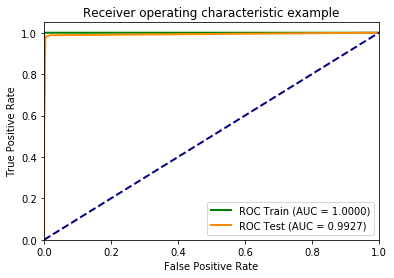

In [617]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

### 5. look at feature importance

In [619]:
for name, imp in zip(df_user[feature_list].columns.values,clf_RF.feature_importances_):
    print(name,"=", imp)

visit_times = 0.014513605786055284
no_events = 0.22510588432339218
new_model = 0.0040692441323706505
new_browser = 0.006100603286634709
os = 0.0030589663233865673
height = 0.01198471643033647
width = 0.013856654509749242
utm_medium = 0.006342756722952878
no_button_clicks = 0.6345840733177807
longest_page_staytime = 0.045178169411179456
average_staytime = 0.035205325756161844


In [621]:
importances=clf_RF.feature_importances_
#sort feature importances in descending order
indices=np.argsort(importances)[::-1]

# rearrange featu renames so they match sorted feature importances
names=[df_user[feature_list].columns.values[i] for i in indices]

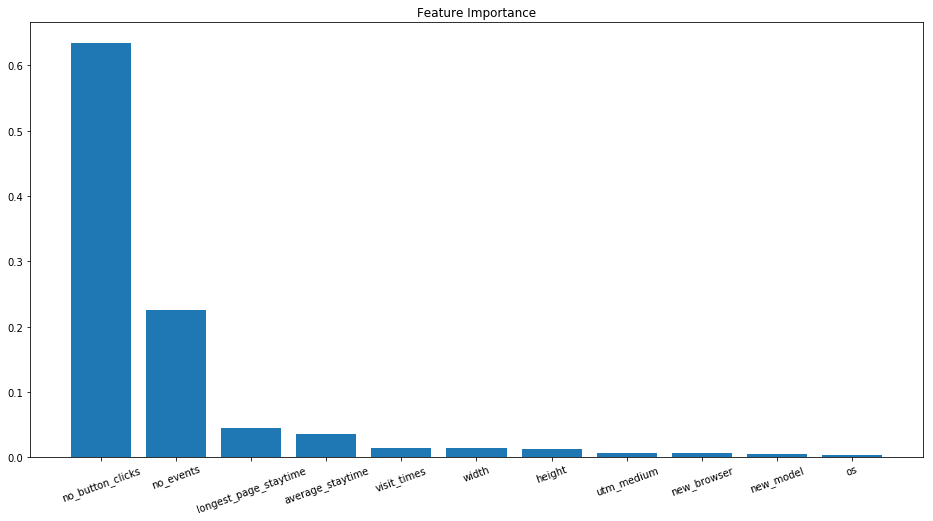

In [622]:
import matplotlib.pyplot as plt
# now plot the importance
plt.figure(figsize=(16,8))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=20,fontsize=10)

plt.title("Feature Importance")
plt.show()

### some conclusion:
It looks like how many times users clicked , how many events in total, stay time are three major features in predicting whether sign up or not. My suggestion to the website is to induce more interactive functions in the page especially the front page where I found previously to have less engagement with the users. 

## Future work

* could it be resolution makes bounce rate bad for certain specific groups?
* acquisition reports: discover which sources send you the highest quality traffic and conversions, marketing campaign. 
* look at bounce rate for each campaign medium/source because bounce rate is actually a better way to look at the success of each medium/source
* bahavior :total page view: how frequently each page on your site was viewed, categorized b  the URL of your website can alse do the same for the title
* average time on page and bounce rate tells engagement to find high/low performance pages pie chart view should be good
* can also track exit page

* which campaign drove the highest quality traffic to your site

